In [1]:
import os
import json
from recordtype import recordtype
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters
import pathlib
plt.rc('text', usetex=True)

import dadrah.util.data_processing as dapr
import dadrah.selection.qr_workflow as qrwf

In [73]:
params_t = recordtype('Parameters','qr_run_n, sig_sample_id, sig_xsec, poly_order, kfold_n')
params = params_t(qr_run_n = 32, sig_sample_id='GtoWW35naReco', sig_xsec=0, poly_order=5, kfold_n=5) 
quantiles = [0.3, 0.5, 0.7, 0.9]

In [74]:
envelope_dir = '/eos/user/k/kiwoznia/data/QR_results/analysis/vae_run_113/qr_run_'+str(params.qr_run_n)+'/sig_GtoWW35naReco/xsec_'+str(params.sig_xsec)+'/loss_rk5_05/envelope'
polys_json_path = os.path.join(envelope_dir, 'polynomials_allQ_allFolds_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
fig_dir = '../fig/poly_analysis/qr'+str(params.qr_run_n)+'/'
pathlib.Path(fig_dir).mkdir(parents=True, exist_ok=True)   

## read envelope

In [75]:
bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)

envelope_per_fold = {}
for k in range(params.kfold_n+1):
    envelope_json_path = os.path.join(envelope_dir, 'cut_stats_allQ_fold'+str(k+1)+'_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
    ff = open(envelope_json_path)
    envelope_per_fold['fold_{}'.format(k+1)] = json.load(ff)
    
envelope_tmp = np.asarray(envelope_per_fold['fold_1'][str(quantiles[0])]) 
x_shift = envelope_tmp[0,bin_idx]
bins = envelope_tmp[:,bin_idx]

In [76]:
bins

array([1227.5, 1287.5, 1353.5, 1422. , 1493. , 1566.5, 1642.5, 1721. ,
       1802.5, 1887. , 1974.5, 2065. , 2158.5, 2255.5, 2355.5, 2459. ,
       2566. , 2676.5, 2791. , 2909. , 3031. , 3157. , 3287. , 3421.5,
       3561. , 3705. , 3853. , 4006. , 4164.5, 4328. , 4497. , 4671.5,
       4851.5, 5037.5, 5229.5, 5450.5, 5655.5, 5844. , 6062. , 6287.5,
       6520. , 6760. ])

In [77]:
bins_n = len(bins)

In [78]:
bins_n

42

In [79]:
arr_tmp = np.empty([0,bins_n])

In [80]:
envelope_tmp[np.newaxis,:,min_idx]

array([[1.67710757, 1.70525026, 1.73561263, 1.7681421 , 1.80166066,
        1.83779562, 1.87533665, 1.91481709, 1.95897722, 2.0060811 ,
        2.05639243, 2.11094499, 2.17085004, 2.23735213, 2.30838394,
        2.38468146, 2.46813917, 2.56112885, 2.66236067, 2.76804733,
        2.88370705, 3.01366687, 3.15768957, 3.31501484, 3.48812938,
        3.6825521 , 3.89179492, 4.09455156, 4.31818056, 4.58075476,
        4.83098602, 5.07522297, 5.32750607, 5.58846045, 5.85801506,
        6.16840458, 6.45635176, 6.72108221, 7.02711916, 7.34346437,
        7.66929674, 8.0051651 ]])

In [81]:
arr_tmp = np.append(arr_tmp, envelope_tmp[np.newaxis,:,min_idx], axis=0)
arr_tmp = np.append(arr_tmp, envelope_tmp[np.newaxis,:,min_idx], axis=0)

In [82]:
np.mean(arr_tmp,axis=0)

array([1.67710757, 1.70525026, 1.73561263, 1.7681421 , 1.80166066,
       1.83779562, 1.87533665, 1.91481709, 1.95897722, 2.0060811 ,
       2.05639243, 2.11094499, 2.17085004, 2.23735213, 2.30838394,
       2.38468146, 2.46813917, 2.56112885, 2.66236067, 2.76804733,
       2.88370705, 3.01366687, 3.15768957, 3.31501484, 3.48812938,
       3.6825521 , 3.89179492, 4.09455156, 4.31818056, 4.58075476,
       4.83098602, 5.07522297, 5.32750607, 5.58846045, 5.85801506,
       6.16840458, 6.45635176, 6.72108221, 7.02711916, 7.34346437,
       7.66929674, 8.0051651 ])

In [83]:
for k in range(params.kfold_n+1):
    envelope_q = np.asarray(envelope_per_fold['fold_{}'.format(k+1)])
    print(envelope_q)

{'0.3': [[1227.5, 1.6774382889270782, 0.00025633845449308075, 1.677107572555542, 1.6777440309524536], [1287.5, 1.7055204510688782, 0.00021168739589058768, 1.7052502632141113, 1.705796480178833], [1353.5, 1.7361787557601929, 0.0005853719877849112, 1.7356126308441162, 1.7369939088821411], [1422.0, 1.7686720490455627, 0.00039603742307447033, 1.7681421041488647, 1.7692192792892456], [1493.0, 1.8019435703754425, 0.00024726636668485246, 1.8016606569290161, 1.8023333549499512], [1566.5, 1.8379497230052948, 0.00010591178077458226, 1.837795615196228, 1.8380922079086304], [1642.5, 1.8755486607551575, 0.00035117398111661024, 1.8753366470336914, 1.8761566877365112], [1721.0, 1.9159032702445984, 0.0006767164907587852, 1.9148170948028564, 1.9165668487548828], [1802.5, 1.9595898389816284, 0.00037561274230443336, 1.958977222442627, 1.9599806070327759], [1887.0, 2.00641667842865, 0.0003470512470758464, 2.0060811042785645, 2.006998300552368], [1974.5, 2.0569493770599365, 0.0005563103017352152, 2.0563924

## plotting functions

In [84]:
def plot_poly_fits(envelope_per_fold, quantiles, params):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    fig, axs = plt.subplots(1, params.kfold_n+1, figsize=(30,4), sharex=True, sharey=True)
    
    for k, ax in zip(range(params.kfold_n+1), axs.flat):
        
        envelope_fold = envelope_per_fold['fold_{}'.format(k+1)]
    
        for q in quantiles:
            
            envelope_q = np.asarray(envelope_fold[str(q)])
            
            x = envelope_q[:,bin_idx]
            y = (envelope_q[:,max_idx]-envelope_q[:,min_idx])/envelope_q[:,mu_idx]
            
            ax.plot(x, y, lw=1.5, label='Q '+str(q))
            ax.set_yscale('log')
            
        ax.set_title('fold {}'.format(k+1))
        ax.legend()
        ax.grid()
        ax.set_xlabel('mJJ')
        axs.flat[0].set_ylabel(r'$\frac{\textrm{max}-\textrm{min}}{\mu}$')
        #ax.set_xlim(right=5000)
        #ax.set_ylim(top=0.1)
        
    plt.savefig(fig_dir+'relative_uncertainty_quantiles.pdf')
    plt.show()

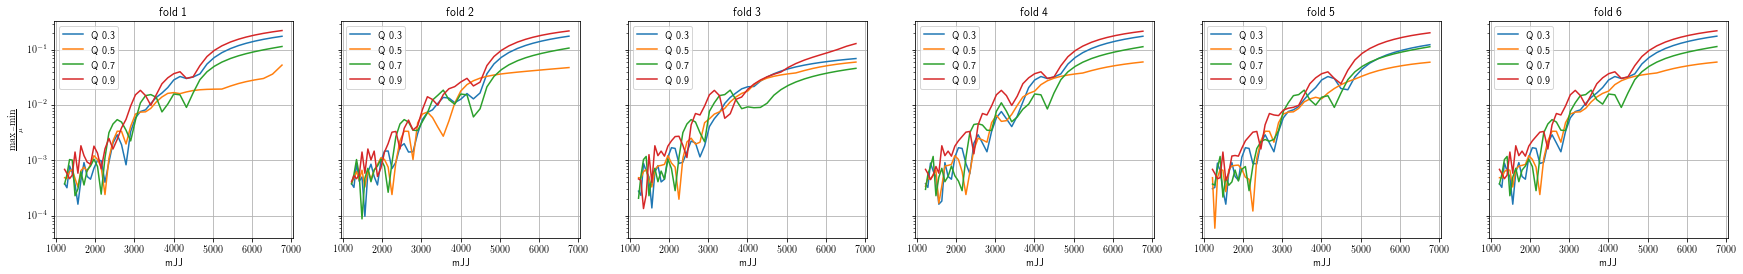

In [85]:
plot_poly_fits(envelope_per_fold, quantiles, params)

In [86]:
def calc_relative_uncertainties(envelope_per_fold, quantiles, params):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    rel_uncert_per_fold = {}
    
    for k in range(params.kfold_n+1):
        
        envelope_fold = envelope_per_fold['fold_{}'.format(k+1)]
        rel_uncert_per_quant = {}
    
        for q in quantiles:
            
            envelope_q = np.asarray(envelope_fold[str(q)])
            
            uncert = (envelope_q[:,max_idx]-envelope_q[:,min_idx])/envelope_q[:,mu_idx]
                        
            rel_uncert_per_quant[str(q)] = uncert
            
        rel_uncert_per_fold['fold_{}'.format(k+1)] = rel_uncert_per_quant
            
    return rel_uncert_per_fold

In [87]:
rel_uncert_per_fold = calc_relative_uncertainties(envelope_per_fold, quantiles, params)

In [88]:
rel_uncert_per_fold['fold_1']['0.3']

array([3.79422838e-04, 3.20264096e-04, 7.95585151e-04, 6.09030454e-04,
       3.73318028e-04, 1.61371505e-04, 4.37227101e-04, 9.13278859e-04,
       5.12038065e-04, 4.57131504e-04, 7.21416508e-04, 1.00430507e-03,
       9.92890269e-04, 4.01760127e-04, 9.29396599e-04, 2.05626558e-03,
       2.91454330e-03, 1.92985790e-03, 8.33120492e-04, 3.34536815e-03,
       5.90598374e-03, 7.67122413e-03, 8.23713280e-03, 1.07629213e-02,
       1.38131663e-02, 1.65971088e-02, 2.08345906e-02, 2.86082182e-02,
       3.30212587e-02, 3.03635637e-02, 3.22799425e-02, 3.68444195e-02,
       5.55591868e-02, 7.29971352e-02, 8.92051877e-02, 1.05933437e-01,
       1.19873058e-01, 1.31539083e-01, 1.43840712e-01, 1.55403563e-01,
       1.66260934e-01, 1.76493771e-01])

In [89]:
def calc_uncertainty_band_per_quantile(uncert_per_fold, quantiles, params, bins):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    uncert_band_per_quantile = {}
    
    for q in quantiles:
        
        uu = np.empty([0, len(bins)])
        
        for k in range(params.kfold_n):
        
            uncert_fold = uncert_per_fold['fold_{}'.format(k+1)]     
            uncert_q = np.asarray(uncert_fold[str(q)])
            
            uu = np.append(uu, uncert_q[np.newaxis,:], axis=0)
            
        min_all_folds = np.min(uu, axis=0).tolist()
        max_all_folds = np.max(uu, axis=0).tolist()
        mu_all_folds = np.mean(uu, axis=0).tolist()
        
        uncert_band_per_quantile[str(q)] = (min_all_folds, max_all_folds, mu_all_folds)
        
    return uncert_band_per_quantile

In [90]:
def plot_uncertainty_band_per_quantile(uncert_band_per_quantile, quantiles, params, bins):
    
    bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)
    
    fig, axs = plt.subplots(1, len(quantiles), figsize=(20,4), sharex=True, sharey=True)
    
    for q, ax in zip(quantiles, axs.flat):
        
        mins, maxs, mus = uncert_band_per_quantile[str(q)]
            
        ax.plot(bins, mus, lw=1.5)
        ax.fill_between(bins, mins, maxs, alpha=0.4, linewidth=0)
        ax.set_yscale('log')
            
        ax.set_title('Q {}'.format(q))
        ax.grid()
        ax.set_xlabel('mJJ')
        axs.flat[0].set_ylabel('min \& max around mu')
        #ax.set_xlim(right=4000)
        #ax.set_ylim(top=3)
        
    plt.savefig(fig_dir+'uncertainty_band_quantiles.pdf')
    plt.show()

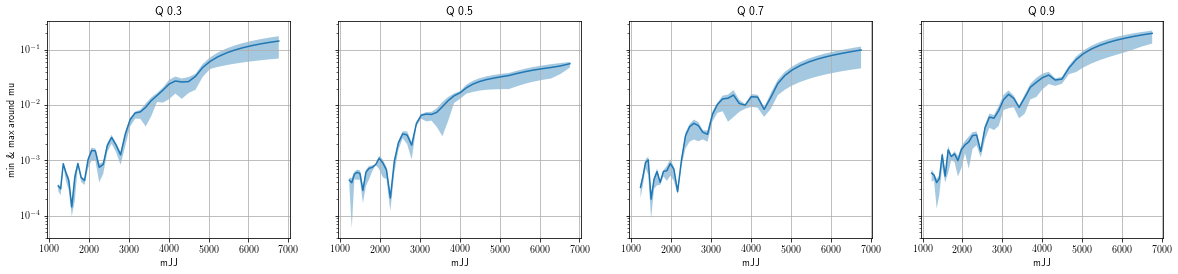

In [91]:
uncert_band_per_quantile = calc_uncertainty_band_per_quantile(rel_uncert_per_fold, quantiles, params, bins)
plot_uncertainty_band_per_quantile(uncert_band_per_quantile, quantiles, params, bins)

In [92]:
uncert_path = os.path.join(envelope_dir, 'uncertainties_allQ_'+ params.sig_sample_id + '_xsec_' + str(params.sig_xsec) + '.json')
with open(uncert_path, 'w') as ff:
    json.dump(uncert_band_per_quantile, ff)

In [93]:
uncert_path

'/eos/user/k/kiwoznia/data/QR_results/analysis/vae_run_113/qr_run_32/sig_GtoWW35naReco/xsec_0/loss_rk5_05/envelope/uncertainties_allQ_GtoWW35naReco_xsec_0.json'